# Project Proposal 

### 1. Introduction
The video game industry began in the 1950s as simple games and simulations. Pixelated screens and limited sound has become a distant memory as video games are offering photorealistic graphics and pushing the frontier of stimulational reality. Video games have become one of the largest sectors in the entertainment market. With the fast growing market, the gaming industry requires marketing data to help predict the sales for their new games. However, in recent years, the emergence of social networks and the developments of mobile games have greatly impacted traditional video games. Careful marketing planning is crucial when a new game is introduced to the market. Therefore, our research question is to predict the sales in the European market for a new video game given North America and other regional sales. To achieve this, we used a dataset generated by scraping of vgchartz.com. It contains a list of video games with sales greater than 100,000 copies from 1980 to 2017.

**Dataset:**
<br> Our dataset can be found at <a href="https://github.com/GregorUT/vgchartzScrape.git" target="_blank">this link</a>.
<br> Dataset is scraped from <a href="https://www.vgchartz.com" target="_blank">Vgchartz website</a>.
<br> List of the fields included in the data are:
* `Name`: name of the game
* `Platform`: platform of the game release
* `Year`: year that the game is released
* `Genre`: genre of the game
* `Publisher`: publisher of the game
* `NA_Sales`: sales in North America (in millions)
* `EU_Sales`: sales in Europe (in millions)
* `JP_Sales`: sales in Japan (in millions)
* `Other_sales`: sales in other countries (in millions)
* `Global_sales`: total worldwide sales

<br> <a href="https://www.kaggle.com/gregorut/videogamesales" target="_blank">Reference</a> can be found here.


In [17]:
library(tidyverse)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(tidymodels)
library(repr)

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘dials’ was built under R version 4.0.2”
Warning message:
“package ‘infer’ was built under R version 4.0.3”
Warning message:
“package ‘modeldata’ was built under R version 4.0.1”
Warning message:
“package ‘parsnip’ was built under R version 4.0.2”
Warning message:
“package ‘recipes’ was built under R version 4.0.1”
Warning message:
“package ‘tune’ was built under R version 4.0.2”
Warning message:
“package ‘workflows’ was built under R version 4.0.2”
Warning message:
“package ‘yardstick’ was built under R version 4.0.2”
── Conflicts ────

**Load data onto Jyputer notebook**

In [24]:
ovg <- read_csv("vgsales.csv")
summary(ovg)

Parsed with column specification:
cols(
  Rank = col_double(),
  Name = col_character(),
  Platform = col_character(),
  Year = col_character(),
  Genre = col_character(),
  Publisher = col_character(),
  NA_Sales = col_double(),
  EU_Sales = col_double(),
  JP_Sales = col_double(),
  Other_Sales = col_double(),
  Global_Sales = col_double()
)



      Rank           Name             Platform             Year          
 Min.   :    1   Length:16598       Length:16598       Length:16598      
 1st Qu.: 4151   Class :character   Class :character   Class :character  
 Median : 8300   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8301                                                           
 3rd Qu.:12450                                                           
 Max.   :16600                                                           
    Genre            Publisher            NA_Sales          EU_Sales      
 Length:16598       Length:16598       Min.   : 0.0000   Min.   : 0.0000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Mode  :character   Mode  :character   Median : 0.0800   Median : 0.0200  
                                       Mean   : 0.2647   Mean   : 0.1467  
                                       3rd Qu.: 0.2400   3rd Qu.: 0.1100  
                                

Dataset is in tidy format, therefore, no additional cleaning and wrangling is necessary. However, missing data (NAs) is removed by using `omit.na` function assuming they are missing at random. Moreover, we focused on games published prior to 2017 since the sales data is incomplete in 2017.

In [25]:
vg <- na.omit(ovg) %>%
      filter(Year<2017)

head(vg)

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


**Split Training/Testing Tests**

In [27]:
set.seed(9999) 

vg_split <- initial_split(vg, prop = 0.75, strata = EU_Sales)  
vg_train <- training(vg_split)   
vg_test <- testing(vg_split)


In [22]:
vg_genre <- vg_train %>%
  group_by(Genre) %>%
  summarise(n=n())%>%
  arrange(desc(n))

`summarise()` ungrouping output (override with `.groups` argument)



### Exploratory Data Analysis

**Summarization**

**Visualization**

## Methods

`summarise()` ungrouping output (override with `.groups` argument)



Genre,n
<chr>,<int>
Action,2433
Sports,1723
Misc,1286
Role-Playing,1090
Adventure,979
Shooter,965
Racing,928
Platform,665
Simulation,634


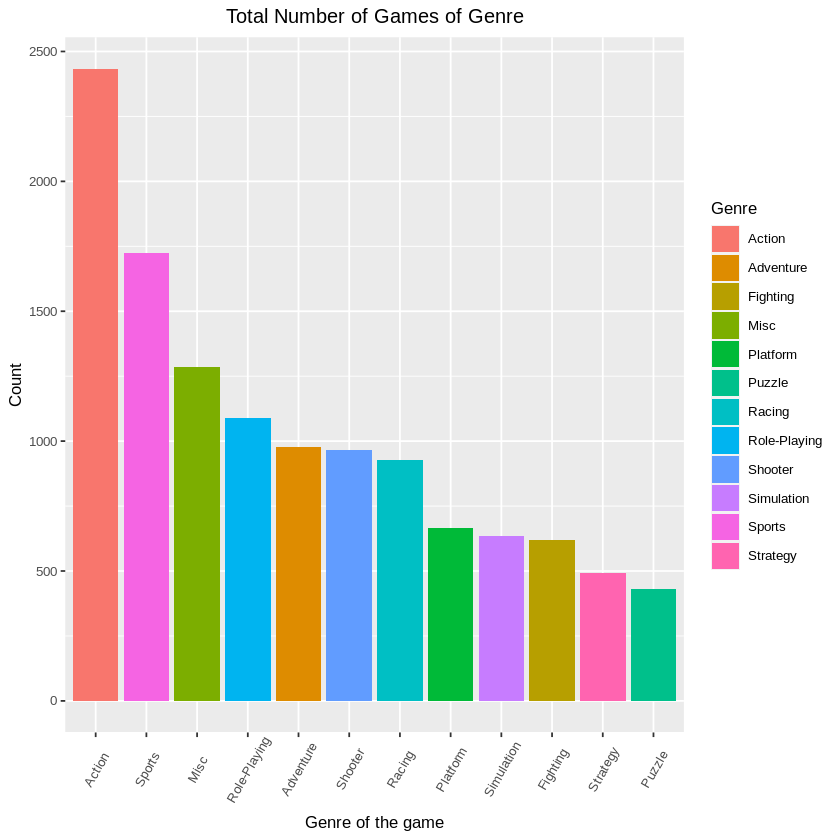

In [31]:
vg_genre <- vg_train %>%
  group_by(Genre) %>%
  summarise(n=n())%>%
  arrange(desc(n))

vg_genre

#Graph 1
#visualization on the number of games in each genre
vg_genre_plot <- vg_genre%>%
  ggplot(aes(x = reorder(Genre, -n), y = n, fill = Genre))+
  geom_bar(stat = 'identity')+
  labs(x = "Genre of the game",
       y = "Count", 
       fill = "Genre",
       title = "Total Number of Games of Genre")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 10))+
  theme(plot.title = element_text(hjust = 0.5))

vg_genre_plot

Three most popular games are action, adventure and fighting. If the gamemaker tries to maximize the revenue, choosing the most liked genre will increase the chance of maximizing the genre. 

## Expected Outcomes

**What do you expect to find?**
<br>Our goal for this project is to predict the sales in Europe for a new video game using sales in NA and other regional sales over years. It will be a regression model based to predict the  trending of decreasing sales on all games because of the increasing games in  market.

**What impact could such findings have?**
<br>Using the visualization of the data, it might be useful for video game producers to predict the sales of new video games  in certain regions. This could help publishers to promote their games on advertisements in one area to maximize the sales.  


**What future questions could this lead to?**
<br>But the salesing value is different in different years.  The value of  unit  money may  change over time. But in this project we are mainly focusing on the trending of the game sales